In [1]:
"""
The goal of this code is to provide a good offensive identity for every NBA player. It does so via KMeans and Spectral Clustering.
The NBA's play-type data provides a lot of information we can use to cluster together players.

Why is this valuable:
(1) From the perspective of the front office, it provides a great deal of statistical information on what other players on the market
may be able to fill in a hole created by a player leaving in free agency
(2) From the perspective of the coaching staff, it creates a frame of reference for the situations in which a player is best used

"""

"\nThe goal of this code is to provide a good offensive identity for every NBA player. It does so via KMeans and Spectral Clustering.\nThe NBA's play-type data provides a lot of information we can use to cluster together players.\n\nWhy is this valuable:\n(1) From the perspective of the front office, it provides a great deal of statistical information on what other players on the market\nmay be able to fill in a hole created by a player leaving in free agency\n(2) From the perspective of the coaching staff, it creates a frame of reference for the situations in which a player is best used\n\n"

In [2]:
#Mathematical tools
import matplotlib.pyplot as plt
from kneed import KneeLocator
import numpy as np
import pandas as pd
from functools import reduce
import seaborn as sns

In [3]:
#Machine learning tools
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
#Read data into dataframe
raw_data = {}
raw_data["isolation"] = pd.read_csv("isolation.csv")
raw_data["cut"] = pd.read_csv("cut.csv")
raw_data["off_screen"] = pd.read_csv("OffScreen.csv")
raw_data["PnR_handler"] = pd.read_csv("PandRBallHandler.csv")
raw_data["PnR_roller"] = pd.read_csv("PandRRoller.csv")
raw_data["post_up"] = pd.read_csv("PostUp.csv")
raw_data["spot_up"] = pd.read_csv("SpotUp.csv")

#Getting rid of NaN row, team name, and player name
for type in raw_data.keys():
    raw_data[type] = raw_data[type].drop([0, 0])
    raw_data[type] = raw_data[type].drop(columns=["TEAM"])
    raw_data[type] = raw_data[type].drop(columns=["PLAYER"])
    
    column_names = []
    for stat in raw_data[type].columns:
        column_names.append(stat + "_" + type)

    raw_data[type].columns = column_names
        

In [5]:
#Let's bring everything to the same scale before clustering.
normalized_data = {}
for key in raw_data.keys():
    normalized_data[key] = pd.DataFrame(StandardScaler().fit_transform(raw_data[key]))
    normalized_data[key] = pd.DataFrame(normalize(normalized_data[key]))

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

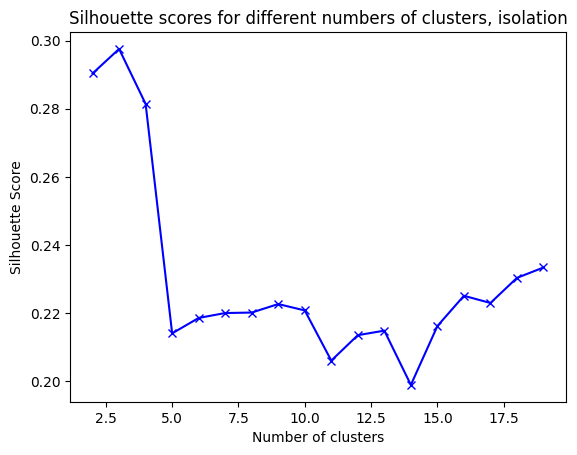

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

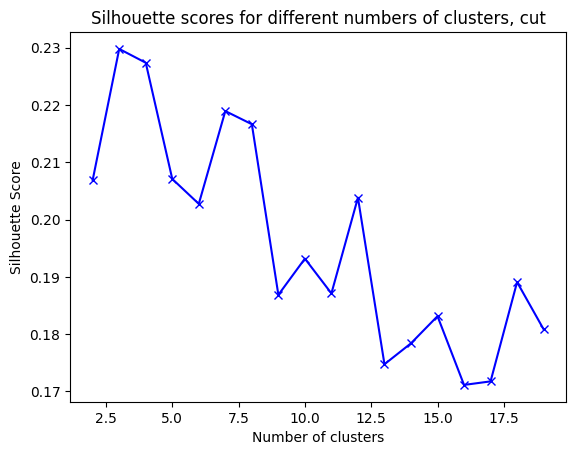

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

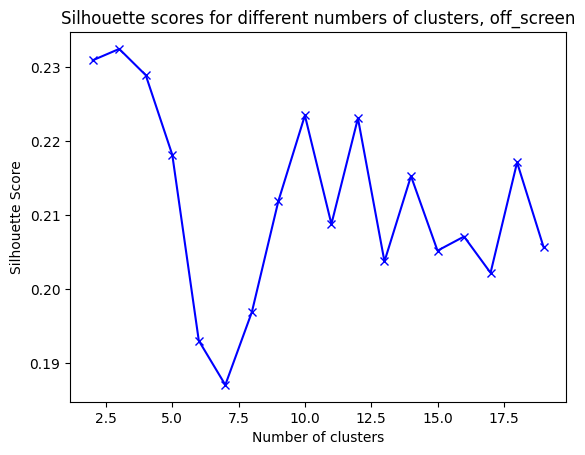

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

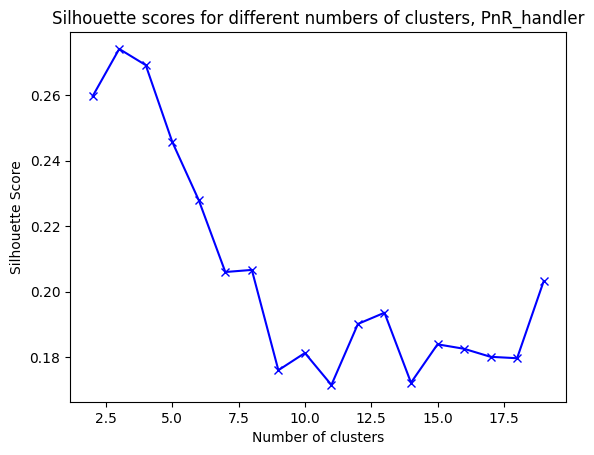

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

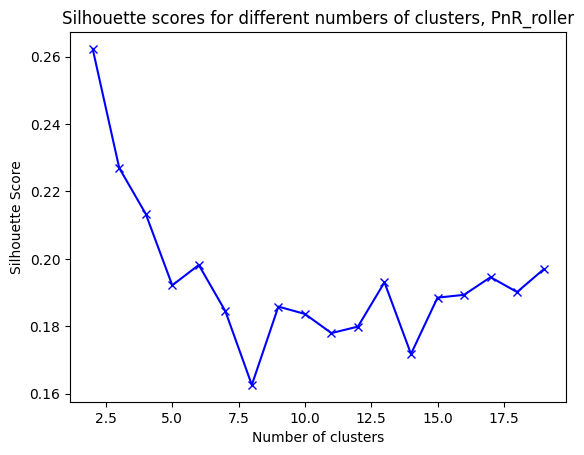

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

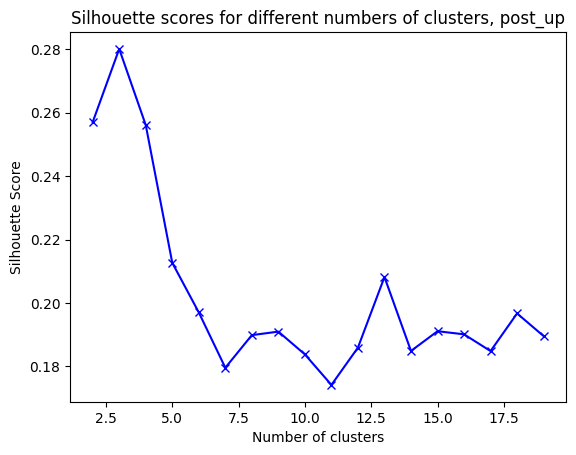

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

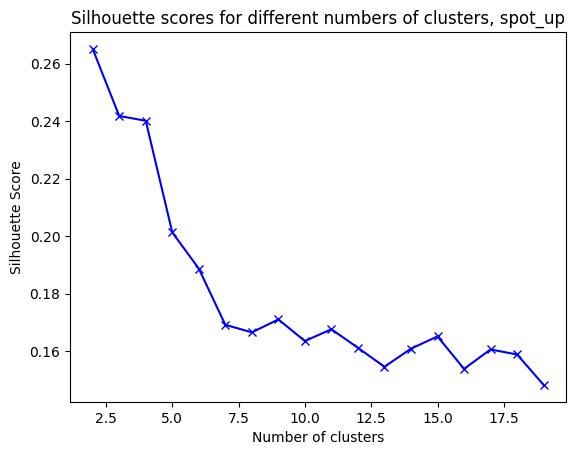

In [6]:
"""
Let's determine the optimal number of clusters via the silhouette method for each play type

"""
for key in normalized_data.keys():
    silhouette_avg = []
    for i in range(2, 20):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(normalized_data[key])
        cluster_labels = kmeans.labels_
    
        silhouette_avg.append(silhouette_score(normalized_data[key], cluster_labels))
    
    plt.plot(range(2, 20), silhouette_avg, 'bx-')
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette scores for different numbers of clusters, " + str(key))
    plt.show()

In [7]:
"""
Checking the maximums, we get the following cluster numbers.
"""
num_clusters = {
    "isolation": 3,
    "cut": 6,
    "off_screen":3,
    "PnR_handler": 3,
    "PnR_roller": 2,
    "post_up": 3,
    "spot_up": 2
}

In [8]:
#We can now start training the KMeans models.
models = {}
for key in normalized_data.keys():
    models[key] = KMeans(n_clusters=num_clusters[key])
    models[key].fit(normalized_data[key])

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

In [9]:
#Get the labels from KMeans clustering
labels_kmeans = {}
for key in models.keys():
    labels_kmeans[key] = pd.DataFrame(models[key].labels_)
    

In [10]:
"""
The data may not naturally cluster in a spherical manner, so let's try spectral clustering as well. 
We'll attempt two different methods for getting the affinity matrix, nearest neighbors and RBF. 
"""

"\nThe data may not naturally cluster in a spherical manner, so let's try spectral clustering as well. \nWe'll attempt two different methods for getting the affinity matrix, nearest neighbors and RBF. \n"

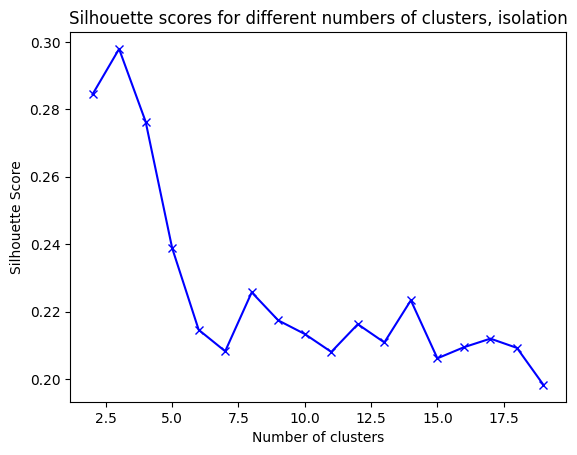

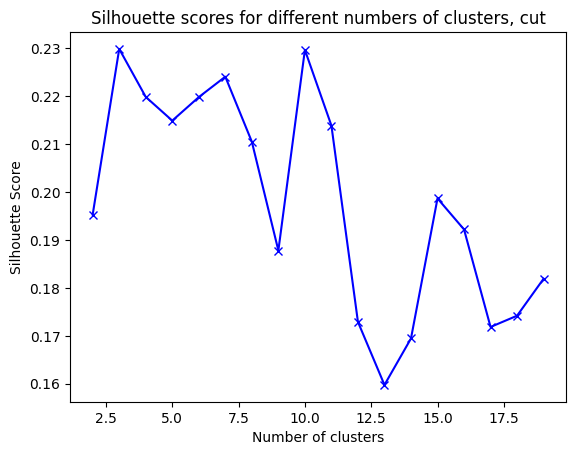

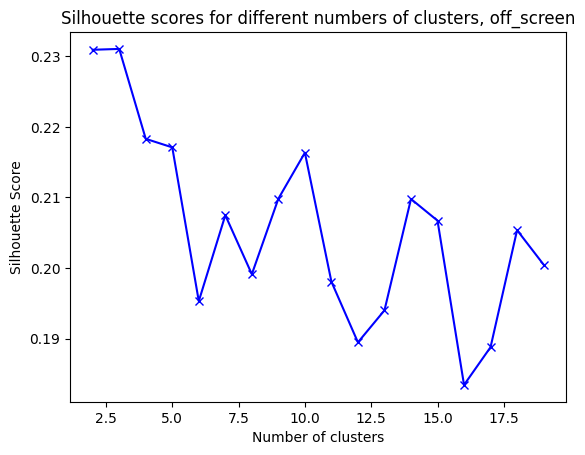

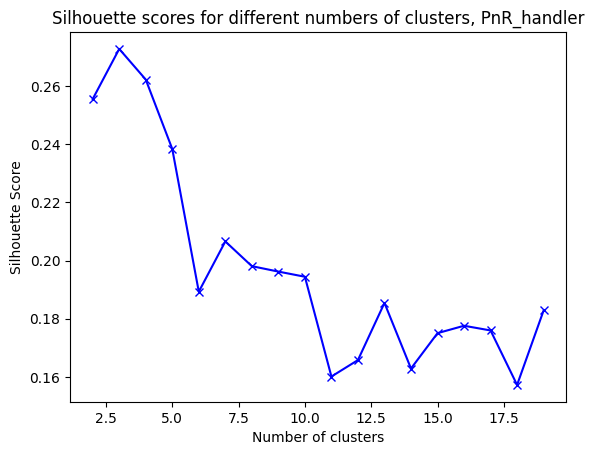

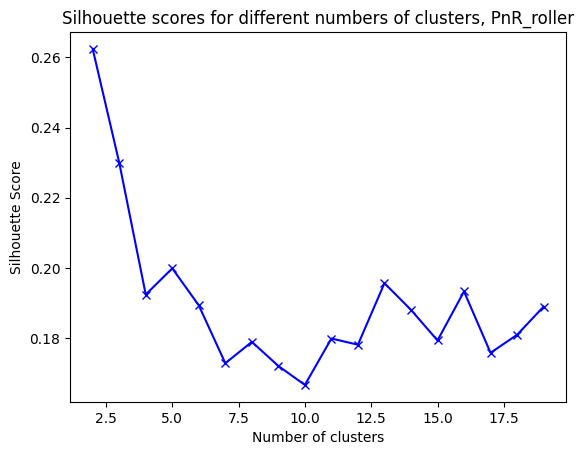

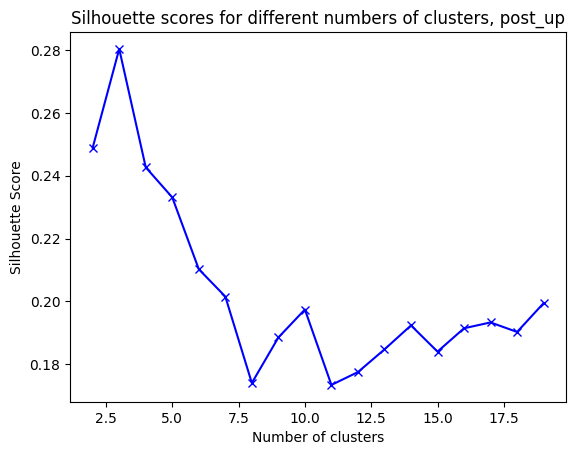

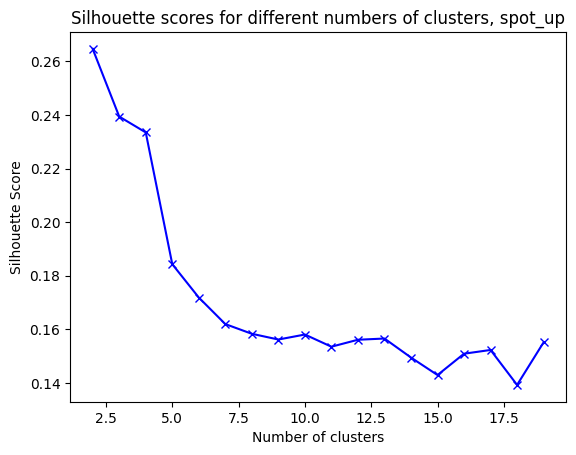

In [11]:
#First, determine the number of clusters via the silhouette scores
for key in normalized_data.keys():
    silhouette_avg = []
    for i in range(2, 20):
        spectral_model_rbf = SpectralClustering(n_clusters=i)
        spectral_model_rbf.fit(normalized_data[key])
        spectral_model_rbf_labels = spectral_model_rbf.labels_
    
        silhouette_avg.append(silhouette_score(normalized_data[key], spectral_model_rbf_labels))
    
    plt.plot(range(2, 20), silhouette_avg, 'bx-')
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette scores for different numbers of clusters, " + str(key))
    plt.show()

In [12]:
num_clusters_spectral = {
    "isolation": 3,
    "cut": 3,
    "off_screen": 3,
    "PnR_handler": 3,
    "PnR_roller": 2,
    "post_up": 3, 
    "spot_up": 2
}

In [13]:
#We can now start training the RBF spectral clustering models.
spectral_rbf_models = {}
for key in normalized_data.keys():
    spectral_rbf_models[key] = SpectralClustering(n_clusters=num_clusters_spectral[key], affinity="rbf")
    spectral_rbf_models[key].fit(normalized_data[key])

In [14]:
#Get the labels 
labels_rbf = {}
for key in spectral_rbf_models.keys():
    labels_rbf[key] = pd.DataFrame(spectral_rbf_models[key].labels_)
    

In [15]:
#Let's train the nearest neighbor models next
spectral_nn_models = {}
for key in normalized_data.keys():
    spectral_nn_models[key] = SpectralClustering(n_clusters=num_clusters_spectral[key], affinity="nearest_neighbors")
    spectral_nn_models[key].fit(normalized_data[key])

In [16]:
#Get the labels 
labels_nn = {}
for key in spectral_nn_models.keys():
    labels_nn[key] = pd.DataFrame(spectral_nn_models[key].labels_)
    

In [20]:
#Let's try to compute the Davies-Bouldin score for all these models. For each given type of model, we'll take the average over all play type models.
kmeans_scores = []
for key in models.keys():
    kmeans_scores.append(davies_bouldin_score(normalized_data[key], labels_kmeans[key].values.ravel()))
print("KMeans average: " + str(np.mean(kmeans_scores)))

rbf_scores = []
for key in spectral_rbf_models.keys():
    rbf_scores.append(davies_bouldin_score(normalized_data[key], labels_rbf[key].values.ravel()))
print("Spectral RBF average: " + str(np.mean(rbf_scores)))

nn_scores = []
for key in spectral_nn_models.keys():
    rbf_scores.append(davies_bouldin_score(normalized_data[key], labels_nn[key].values.ravel()))
print("Spectral NN average: " + str(np.mean(rbf_scores)))
            
    

KMeans average: 1.3907445954478277
Spectral RBF average: 1.408598028528355
Spectral NN average: 1.4190989824766584


<Axes: >

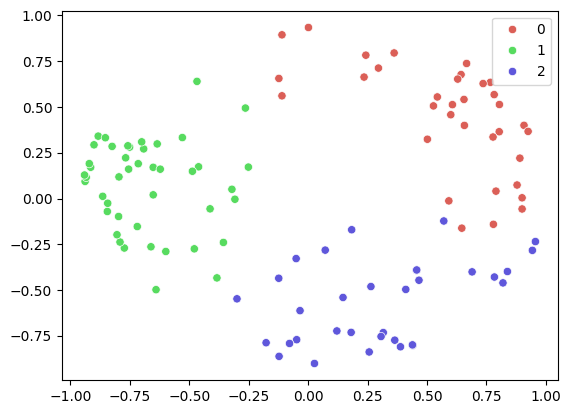

In [63]:
#Isolation scatterplot
pca = PCA(n_components=2)
pca_results = pca.fit_transform(normalized_data["isolation"])
sns.scatterplot(
    x=pca_results[:,0],
    y=pca_results[:,1],
    palette=sns.color_palette("hls", num_clusters["isolation"]),
    legend="full",
    hue=models["isolation"].labels_
)

<Axes: >

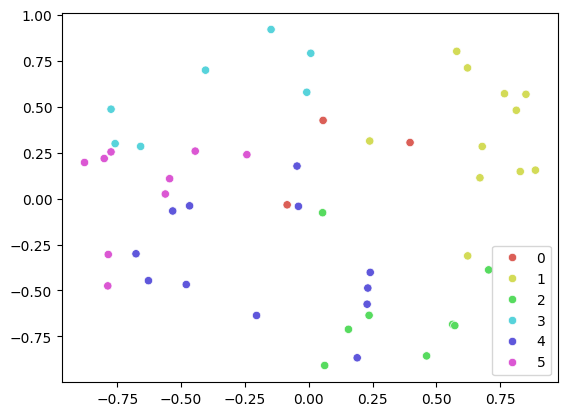

In [64]:
#Cut scatterplot. Doesn't really cluster well here
pca = PCA(n_components=2)
pca_results = pca.fit_transform(normalized_data["cut"])
sns.scatterplot(
    x=pca_results[:,0],
    y=pca_results[:,1],
    palette=sns.color_palette("hls", num_clusters["cut"]),
    legend="full",
    hue=models["cut"].labels_
)

<Axes: >

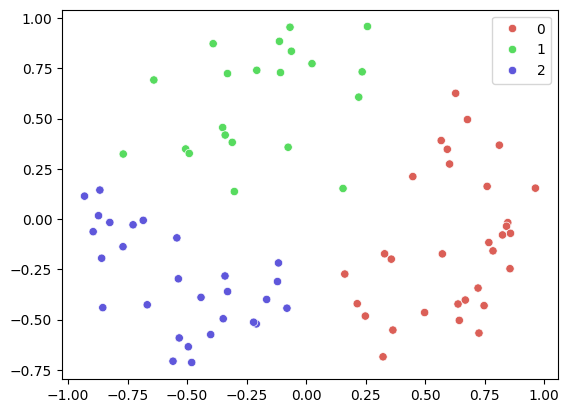

In [65]:
#off_screen
pca = PCA(n_components=2)
pca_results = pca.fit_transform(normalized_data["off_screen"])
sns.scatterplot(
    x=pca_results[:,0],
    y=pca_results[:,1],
    palette=sns.color_palette("hls", num_clusters["off_screen"]),
    legend="full",
    hue=models["off_screen"].labels_
)

<Axes: >

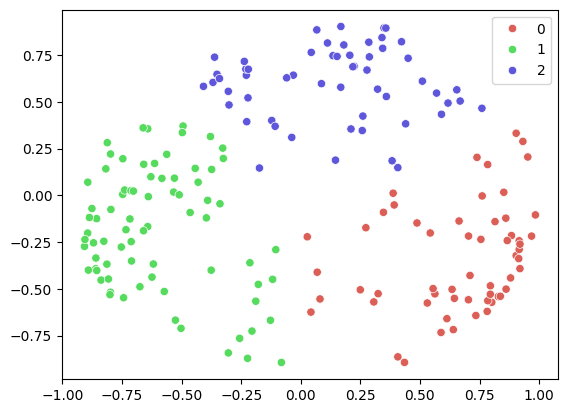

In [66]:
#Pick and roll ball handler
pca = PCA(n_components=2)
pca_results = pca.fit_transform(normalized_data["PnR_handler"])
sns.scatterplot(
    x=pca_results[:,0],
    y=pca_results[:,1],
    palette=sns.color_palette("hls", num_clusters["PnR_handler"]),
    legend="full",
    hue=models["PnR_handler"].labels_
)

In [ ]:
#Pick and roll roller
pca = PCA(n_components=2)
pca_results = pca.fit_transform(normalized_data["isolation"])
sns.scatterplot(
    x=pca_results[:,0],
    y=pca_results[:,1],
    palette=sns.color_palette("hls", num_clusters["isolation"]),
    legend="full",
    hue=models["isolation"].labels_
)